In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from keras import optimizers
from keras.utils import to_categorical
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
%matplotlib inline

Using TensorFlow backend.


In [2]:
np.random.seed(101)

In [3]:
training_path_normal = 'train/NORMAL/'
training_path_pneumonia = 'train/PNEUMONIA/'
testing_path_normal = 'test/NORMAL/'
testing_path_pneumonia = 'test/PNEUMONIA/'
validation_path_normal = 'val/NORMAL/'
validation_path_pneumonia = 'val/PNEUMONIA/'

In [4]:
ltr_norm = os.listdir(training_path_normal)
ltr_pneu = os.listdir(training_path_pneumonia)
lte_norm = os.listdir(testing_path_normal)
lte_pneu = os.listdir(testing_path_pneumonia)
lval_norm = os.listdir(validation_path_normal)
lval_pneu = os.listdir(validation_path_pneumonia)

In [5]:
pixel = 100

In [6]:
def resizer(pic):
    pic = cv2.resize(pic,(pixel,pixel))
    pic = pic/255;
    return pic

In [7]:
data_train = []
for i in tqdm(range(len(ltr_norm))):
    img_path = training_path_normal+ltr_norm[i]
    if('DS' in ltr_norm[i] or 'ipynb' in ltr_norm[i]):
        continue
    pic = cv2.imread(img_path)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = resizer(pic)
    data_train.append([pic,0])
for j in tqdm(range(len(ltr_pneu))):
    if('DS' in ltr_pneu[j] or 'ipynb' in ltr_pneu[j]):
        continue
    pic = cv2.imread(training_path_pneumonia+ltr_pneu[j])
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = resizer(pic)
    data_train.append([pic,1])

data_train = np.array(data_train)
np.random.shuffle(data_train)

100%|██████████████████████████████████████████████████████████████████████████████| 3876/3876 [00:46<00:00, 82.96it/s]


In [8]:
X_train = []
Y_train = []
training_length = data_train.shape[0]
for i in tqdm(range(training_length)):
    X_train.append(data_train[i][0])
    Y_train.append(data_train[i][1])
X_train = np.array(X_train)
Y_train = np.array(Y_train)
Y_train = np.reshape(Y_train,(Y_train.shape[0],1))

100%|██████████████████████████████████████████████████████████████████████████| 5216/5216 [00:00<00:00, 333920.81it/s]


In [9]:
print(X_train.shape,'\t',Y_train.shape)

(5216, 100, 100, 3) 	 (5216, 1)


In [10]:
data_test = []
for i in tqdm(range(len(lte_norm))):
    img_path = testing_path_normal+lte_norm[i]
    if('DS' in lte_norm[i] or 'ipynb' in lte_norm[i]):
        continue
    pic = cv2.imread(img_path)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = resizer(pic)
    data_test.append([pic,0])
for j in tqdm(range(len(lte_pneu))):
    if('DS' in lte_pneu[j] or 'ipynb' in lte_pneu[j]):
        continue
    pic = cv2.imread(testing_path_pneumonia+lte_pneu[j])
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = resizer(pic)
    data_test.append([pic,1])

data_test = np.array(data_test)
np.random.shuffle(data_test)

100%|████████████████████████████████████████████████████████████████████████████████| 390/390 [00:04<00:00, 93.86it/s]


In [11]:
X_test = []
Y_test = []
testing_length = data_test.shape[0]
for i in tqdm(range(testing_length)):
    X_test.append(data_test[i][0])
    Y_test.append(data_test[i][1])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_test = np.reshape(Y_test,(Y_test.shape[0],1))

100%|████████████████████████████████████████████████████████████████████████████████████████| 624/624 [00:00<?, ?it/s]


In [12]:
print(X_test.shape,'\t',Y_test.shape)

(624, 100, 100, 3) 	 (624, 1)


In [13]:
data_val = []
for i in tqdm(range(len(lval_norm))):
    img_path = validation_path_normal+lval_norm[i]
    if('DS' in lval_norm[i] or 'ipynb' in lval_norm[i]):
        continue
    pic = cv2.imread(img_path)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = resizer(pic)
    data_val.append([pic,0])
for j in tqdm(range(len(lval_pneu))):
    if('DS' in lval_pneu[j] or 'ipynb' in lval_pneu[j]):
        continue
    pic = cv2.imread(validation_path_pneumonia+lval_pneu[j])
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = resizer(pic)
    data_val.append([pic,1])

data_val = np.array(data_val)
np.random.shuffle(data_val)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 95.99it/s]


In [14]:
X_val = []
Y_val = []
val_length = data_val.shape[0]
for i in tqdm(range(val_length)):
    X_val.append(data_val[i][0])
    Y_val.append(data_val[i][1])
X_val = np.array(X_val)
Y_val = np.array(Y_val)
Y_val = np.reshape(Y_val,(Y_val.shape[0],1))

100%|██████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<?, ?it/s]


In [15]:
print(X_val.shape,'\t',Y_val.shape)

(16, 100, 100, 3) 	 (16, 1)


In [21]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_val = to_categorical(Y_val)

In [17]:
# Fitting CNN

model = Sequential()
model.add(Conv2D(32, kernel_size=5, activation='relu', input_shape=(pixel,pixel,X_train.shape[3]), padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=4, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=3, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

W1219 22:54:34.267440 12116 deprecation_wrapper.py:119] From g:\anaconda3\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [18]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, Y_train,validation_split = 0.2, batch_size=128, epochs=30,verbose=2)

W1219 22:54:56.446364 12116 deprecation_wrapper.py:119] From g:\anaconda3\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 4172 samples, validate on 1044 samples
Epoch 1/30
 - 31s - loss: 0.5656 - accuracy: 0.7272 - val_loss: 0.4225 - val_accuracy: 0.7730
Epoch 2/30
 - 13s - loss: 0.2803 - accuracy: 0.8837 - val_loss: 0.1947 - val_accuracy: 0.9243
Epoch 3/30
 - 13s - loss: 0.1696 - accuracy: 0.9300 - val_loss: 0.1551 - val_accuracy: 0.9425
Epoch 4/30
 - 14s - loss: 0.1337 - accuracy: 0.9494 - val_loss: 0.1391 - val_accuracy: 0.9492
Epoch 5/30
 - 14s - loss: 0.1086 - accuracy: 0.9588 - val_loss: 0.1403 - val_accuracy: 0.9502
Epoch 6/30
 - 14s - loss: 0.1005 - accuracy: 0.9624 - val_loss: 0.1776 - val_accuracy: 0.9310
Epoch 7/30
 - 14s - loss: 0.0875 - accuracy: 0.9674 - val_loss: 0.1094 - val_accuracy: 0.9607
Epoch 8/30
 - 14s - loss: 0.0806 - accuracy: 0.9712 - val_loss: 0.1064 - val_accuracy: 0.9617
Epoch 9/30
 - 14s - loss: 0.0870 - accuracy: 0.9660 - val_loss: 0.1002 - val_accuracy: 0.9626
Epoch 10/30
 - 14s - loss: 0.0706 - accuracy: 0.9748 - val_loss: 0.1107 - val_accuracy: 0.9511
Epoch 11/30

In [22]:
model.evaluate(X_test,Y_test)

624/624 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 3ms/step


[1.483184278011322, 0.7580128312110901]

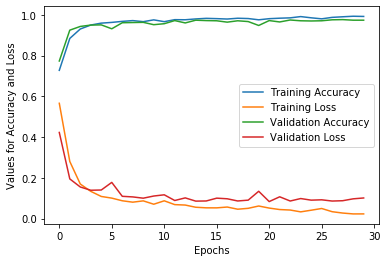

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Values for Accuracy and Loss')
plt.legend(['Training Accuracy','Training Loss','Validation Accuracy','Validation Loss'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 16)        8208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [25]:
model.save('Pneumonia-CNN-model.h5')

In [34]:
feed_xray = cv2.resize(xray,(pixel,pixel))

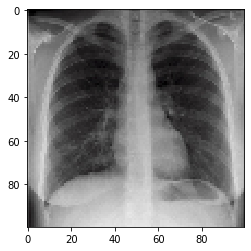

In [35]:
plt.imshow(feed_xray)
plt.show()

In [38]:
pr = model.predict_classes(feed_xray.reshape(1,pixel,pixel,X_train.shape[3]))

In [41]:
pr[0]

0

In [46]:
def checkXray(xray_img_path):
    """
    Takes X-ray image that is to be tested, as the input and outputs whether the person has pneumonia or is normal. 
    """
    target = ['normal X-ray','Pneumonia X-ray']
    xray = cv2.imread(xray_img_path)
    xray = cv2.cvtColor(xray,cv2.COLOR_BGR2RGB)
    feed_xray = cv2.resize(xray,(pixel,pixel))
    xray_model = load_model('Pneumonia-CNN-model.h5')
    pr = model.predict_classes(feed_xray.reshape(1,pixel,pixel,X_train.shape[3]))
    print(target[pr[0]])
    plt.imshow(xray)
    plt.show()

normal X-ray


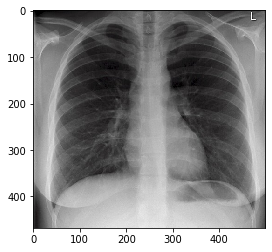

In [47]:
checkXray('chest-xray_normal.jpg')

Pneumonia X-ray


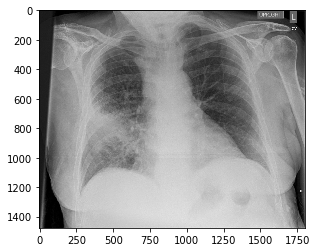

In [49]:
checkXray('chest-xray_pneumonia.jpg')